In [ ]:
# install Anaconda3
!wget -qO ac.sh https://repo.anaconda.com/archive/Anaconda3-2020.07-Linux-x86_64.sh 
!bash ./ac.sh -b

In [ ]:
# a fake google.colab library
!ln -s /usr/local/lib/python3.6/dist-packages/google \
       /root/anaconda3/lib/python3.8/site-packages/google

In [ ]:
# start jupyterlab, which now has Python3 = 3.8
!nohup /root/anaconda3/bin/jupyter-lab --ip=0.0.0.0&

nohup: appending output to 'nohup.out'


In [ ]:
# access through ngrok, click the link
!pip install pyngrok -q
from pyngrok import ngrok
print(ngrok.connect(8888))

NgrokTunnel: "http://6723a3ae4705.ngrok.io" -> "http://localhost:8888"


In [3]:
import platform
print(platform.python_version())

3.6.9


In [4]:
pip install ananke-causal

     |████████████████████████████████| 225kB 6.4MB/s 


In [5]:
from ananke.graphs import ADMG
from ananke.identification import OneLineID
from ananke.estimation import CausalEffect
from ananke.datasets import load_afixable_data
from ananke.estimation import AutomatedIF
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Case study 3, building the graph

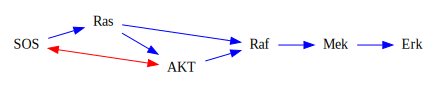

In [6]:
vertices_case3 = ['SOS', 'Ras','Raf','AKT','Mek','Erk']
di_edges_case3 = [('SOS','Ras'), ('Ras','AKT'),('Ras','Raf'),
            ('AKT','Raf'), ('Raf','Mek'),('Mek','Erk')]
bi_edges_case3 = [('SOS','AKT')]
Case3 = ADMG(vertices_case3, di_edges_case3, bi_edges_case3)
Case3.draw(direction='LR')

In [7]:
one_id = OneLineID(graph=Case3, treatments=['SOS'], outcomes=['Erk'])
one_id.id()

True

In [8]:
ate_obj_case3 = CausalEffect(graph=Case3, treatment='SOS', outcome='Erk')  # setting up the CausalEffect object
ate_obj_case3


 Treatment is p-fixable and graph is mb-shielded. 

 Available estimators are:

1. Primal IPW (p-ipw)
2. Dual IPW (d-ipw)
3. APIPW (apipw)
4. Efficient APIPW (eff-apipw) 
 
Suggested estimator is Efficient APIPW 



Read observational data:

In [ ]:
obs_data1_case3 = pd.read_csv('obs_data1_case3.csv', sep=',')
obs_data1_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data2_case3 = pd.read_csv('obs_data2_case3.csv', sep=',')
obs_data2_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data3_case3 = pd.read_csv('obs_data3_case3.csv', sep=',')
obs_data3_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data4_case3 = pd.read_csv('obs_data4_case3.csv', sep=',')
obs_data4_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data5_case3 = pd.read_csv('obs_data5_case3.csv', sep=',')
obs_data5_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data6_case3 = pd.read_csv('obs_data6_case3.csv', sep=',')
obs_data6_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data7_case3 = pd.read_csv('obs_data7_case3.csv', sep=',')
obs_data7_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data8_case3 = pd.read_csv('obs_data8_case3.csv', sep=',')
obs_data8_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data9_case3 = pd.read_csv('obs_data9_case3.csv', sep=',')
obs_data9_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
obs_data10_case3 = pd.read_csv('obs_data10_case3.csv', sep=',')
obs_data10_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)

In [11]:
obs_data_list_case3 = []
obs_data_list_case3.append(obs_data1_case3)
obs_data_list_case3.append(obs_data2_case3)
obs_data_list_case3.append(obs_data3_case3)
obs_data_list_case3.append(obs_data4_case3)
obs_data_list_case3.append(obs_data5_case3)
obs_data_list_case3.append(obs_data6_case3)
obs_data_list_case3.append(obs_data7_case3)
obs_data_list_case3.append(obs_data8_case3)
obs_data_list_case3.append(obs_data9_case3)
obs_data_list_case3.append(obs_data10_case3)

Read interventional data:

In [ ]:
intv_data1_case3 = pd.read_csv('intv_data1_case3.csv', sep=',')
intv_data1_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data2_case3 = pd.read_csv('intv_data2_case3.csv', sep=',')
intv_data2_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data3_case3 = pd.read_csv('intv_data3_case3.csv', sep=',')
intv_data3_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data4_case3 = pd.read_csv('intv_data4_case3.csv', sep=',')
intv_data4_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data5_case3 = pd.read_csv('intv_data5_case3.csv', sep=',')
intv_data5_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data6_case3 = pd.read_csv('intv_data6_case3.csv', sep=',')
intv_data6_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data7_case3 = pd.read_csv('intv_data7_case3.csv', sep=',')
intv_data7_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data8_case3 = pd.read_csv('intv_data8_case3.csv', sep=',')
intv_data8_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data9_case3 = pd.read_csv('intv_data9_case3.csv', sep=',')
intv_data9_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)
intv_data10_case3 = pd.read_csv('intv_data10_case3.csv', sep=',')
intv_data10_case3.drop(['Unnamed: 0','EGFR','IGFR', 'PI3K'], axis=1)

In [13]:
intv_data_list_case3 = []
intv_data_list_case3.append(intv_data1_case3)
intv_data_list_case3.append(intv_data2_case3)
intv_data_list_case3.append(intv_data3_case3)
intv_data_list_case3.append(intv_data4_case3)
intv_data_list_case3.append(intv_data5_case3)
intv_data_list_case3.append(intv_data6_case3)
intv_data_list_case3.append(intv_data7_case3)
intv_data_list_case3.append(intv_data8_case3)
intv_data_list_case3.append(intv_data9_case3)
intv_data_list_case3.append(intv_data10_case3)

# absolute average error (AAE)

In [ ]:
means_p_ipw_case3 = [0]*10
means_d_ipw_case3 = [0]*10
means_list_p_ipw_case3 = {}
means_list_d_ipw_case3 = {}
for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case3 = abs(intv_data_list_case3[i]['Erk'].mean() - obs_data_list_case3[i]['Erk'].mean())
    data = obs_data_list_case3[i].iloc[0:num_data_points,]
    ace_p_ipw_case3 = ate_obj_case3.compute_effect(data, "p-ipw")
    ace_d_ipw_case3 = ate_obj_case3.compute_effect(data, "d-ipw")
    means_p_ipw_case3[i] = abs(True_case3 - ace_p_ipw_case3)
    means_d_ipw_case3[i] = abs(True_case3 - ace_d_ipw_case3)
  means_list_p_ipw_case3[num_data_points] = (means_p_ipw_case3)
  means_p_ipw_case3 = [0]*10
  means_list_d_ipw_case3[num_data_points] = (means_d_ipw_case3)
  means_d_ipw_case3 = [0]*10

In [15]:
df_p_ipw_case3 = pd.DataFrame(data = means_list_p_ipw_case3 )
df_d_ipw_case3 = pd.DataFrame(data = means_list_d_ipw_case3 )

In [16]:
df_p_ipw_case3.to_csv('df_p_ipw_case3.csv')
df_d_ipw_case3.to_csv('df_d_ipw_case3.csv')

# Case Study 4 : Building the graph

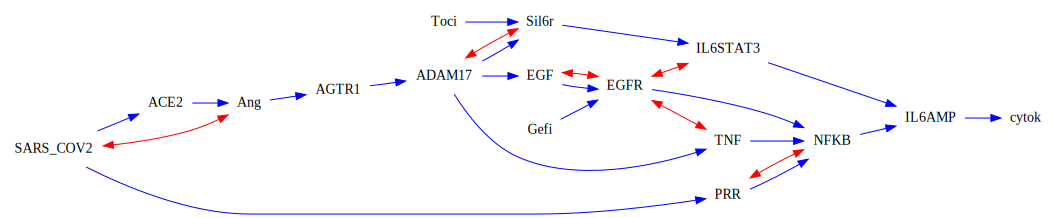

In [24]:
vertices_case4 = ['SARS_COV2', 'ACE2','Ang','AGTR1','ADAM17','Toci','Sil6r','EGF','TNF','EGFR','PRR','NFKB','IL6STAT3','IL6AMP','cytok','Gefi']
di_edges_case4 = [('SARS_COV2','ACE2'),('ACE2','Ang'),('Ang','AGTR1'),('AGTR1','ADAM17'),('ADAM17','EGF'),('ADAM17','TNF'),('ADAM17','Sil6r'),('SARS_COV2','PRR'),
                  ('PRR','NFKB'),('EGFR','NFKB'),('TNF','NFKB'),('Sil6r','IL6STAT3'),('Toci','Sil6r'),('NFKB','IL6AMP'),('IL6AMP','cytok'),('IL6STAT3','IL6AMP'),('EGF','EGFR'), ('Gefi', 'EGFR')]
bi_edges_case4 = [('SARS_COV2','Ang'), ('ADAM17','Sil6r'),('PRR','NFKB'),
            ('EGF','EGFR'), ('EGFR','TNF'),('EGFR','IL6STAT3')]
Case4 = ADMG(vertices_case4, di_edges_case4, bi_edges_case4)
Case4.draw(direction='LR')

In [25]:
one_id = OneLineID(graph=Case4, treatments=['Sil6r'], outcomes=['cytok'])
one_id.id()

True

In [26]:
one_id = OneLineID(graph=Case4, treatments=['EGFR'], outcomes=['cytok'])
one_id.id()

True

In [ ]:
ate_obj_case4_sil6r = CausalEffect(graph=Case4, treatment='Sil6r', outcome='cytok')  # setting up the CausalEffect object
ate_obj_case4_sil6r

In [ ]:
ate_obj_case4_egfr = CausalEffect(graph=Case4, treatment='EGFR', outcome='cytok')  # setting up the CausalEffect object
ate_obj_case4_egfr

In [29]:
obs_data1_case4 = pd.read_csv('obs_data1_Case4.csv', sep=',')
obs_data2_case4 = pd.read_csv('obs_data2_Case4.csv', sep=',')
obs_data3_case4 = pd.read_csv('obs_data3_Case4.csv', sep=',')
obs_data4_case4 = pd.read_csv('obs_data4_Case4.csv', sep=',')
obs_data5_case4 = pd.read_csv('obs_data5_Case4.csv', sep=',')
obs_data6_case4 = pd.read_csv('obs_data6_Case4.csv', sep=',')
obs_data7_case4 = pd.read_csv('obs_data7_Case4.csv', sep=',')
obs_data8_case4 = pd.read_csv('obs_data8_Case4.csv', sep=',')
obs_data9_case4 = pd.read_csv('obs_data9_Case4.csv', sep=',')
obs_data10_case4 = pd.read_csv('obs_data10_Case4.csv', sep=',')

In [30]:
obs_data_list_case4 = []
obs_data_list_case4.append(obs_data1_case4)
obs_data_list_case4.append(obs_data2_case4)
obs_data_list_case4.append(obs_data3_case4)
obs_data_list_case4.append(obs_data4_case4)
obs_data_list_case4.append(obs_data5_case4)
obs_data_list_case4.append(obs_data6_case4)
obs_data_list_case4.append(obs_data7_case4)
obs_data_list_case4.append(obs_data8_case4)
obs_data_list_case4.append(obs_data9_case4)
obs_data_list_case4.append(obs_data10_case4)

In [31]:
intv_data1_case4 = pd.read_csv('intv_data1_Case4.csv', sep=',')
intv_data2_case4 = pd.read_csv('intv_data2_Case4.csv', sep=',')
intv_data3_case4 = pd.read_csv('intv_data3_Case4.csv', sep=',')
intv_data4_case4 = pd.read_csv('intv_data4_Case4.csv', sep=',')
intv_data5_case4 = pd.read_csv('intv_data5_Case4.csv', sep=',')
intv_data6_case4 = pd.read_csv('intv_data6_Case4.csv', sep=',')
intv_data7_case4 = pd.read_csv('intv_data7_Case4.csv', sep=',')
intv_data8_case4 = pd.read_csv('intv_data8_Case4.csv', sep=',')
intv_data9_case4 = pd.read_csv('intv_data9_Case4.csv', sep=',')
intv_data10_case4 = pd.read_csv('intv_data10_Case4.csv', sep=',')

In [32]:
intv_data_list_case4 = []
intv_data_list_case4.append(intv_data1_case4)
intv_data_list_case4.append(intv_data2_case4)
intv_data_list_case4.append(intv_data3_case4)
intv_data_list_case4.append(intv_data4_case4)
intv_data_list_case4.append(intv_data5_case4)
intv_data_list_case4.append(intv_data6_case4)
intv_data_list_case4.append(intv_data7_case4)
intv_data_list_case4.append(intv_data8_case4)
intv_data_list_case4.append(intv_data9_case4)
intv_data_list_case4.append(intv_data10_case4)

# absolute average error (AAE)

In [ ]:
#means_ipw_case4_sil6r = [0]*10
#means_list_ipw_case4_sil6r = {}
means_gformula_case4_sil6r = [0]*10
means_list_gformula_case4_sil6r = {}
means_aipw_case4_sil6r = [0]*10
means_list_aipw_case4_sil6r = {}
for num_data_points in [60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case4 = abs(intv_data_list_case4[i]['cytok'].mean() - obs_data_list_case4[i]['cytok'].mean())
    data = obs_data_list_case4[i].iloc[0:num_data_points,]
    #ace_ipw_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "ipw")
    #means_ipw_case4_sil6r[i] = abs(True_case4 - ace_ipw_case4_sil6r)
    ace_gformula_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "gformula")
    means_gformula_case4_sil6r[i] = abs(True_case4 - ace_gformula_case4_sil6r)
    ace_aipw_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "aipw")
    means_aipw_case4_sil6r[i] = abs(True_case4 - ace_aipw_case4_sil6r)
  means_list_gformula_case4_sil6r[num_data_points] = (means_gformula_case4_sil6r)
  means_gformula_case4_sil6r = [0]*10
  means_list_aipw_case4_sil6r[num_data_points] = (means_aipw_case4_sil6r)
  means_aipw_case4_sil6r = [0]*10
  #means_list_ipw_case4_sil6r[num_data_points] = means_ipw_case4_sil6r
  #means_ipw_case4_sil6r = [0]*10

In [ ]:
#means_ipw_case4_egfr = [0]*10
#means_list_ipw_case4_egfr = {}
means_gformula_case4_egfr = [0]*10
means_list_gformula_case4_egfr = {}
means_aipw_case4_egfr = [0]*10
means_list_aipw_case4_egfr = {}
for num_data_points in [60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case4 = abs(intv_data_list_case4[i]['cytok'].mean() - obs_data_list_case4[i]['cytok'].mean())
    data = obs_data_list_case4[i].iloc[0:num_data_points,]
    #ace_ipw_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "ipw")
    #means_ipw_case4_egfr[i] = abs(True_case4 - ace_ipw_case4_egfr)
    ace_gformula_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "gformula")
    means_gformula_case4_egfr[i] = abs(True_case4 - ace_gformula_case4_egfr)
    ace_aipw_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "aipw")
    means_aipw_case4_egfr[i] = abs(True_case4 - ace_aipw_case4_egfr)
  means_list_gformula_case4_egfr[num_data_points] = (means_gformula_case4_egfr)
  means_gformula_case4_egfr = [0]*10
  means_list_aipw_case4_egfr[num_data_points] = (means_aipw_case4_egfr)
  means_aipw_case4_egfr = [0]*10
  #means_list_ipw_case4_egfr[num_data_points] = means_ipw_case4_egfr
  #means_ipw_case4_egfr = [0]*10

In [23]:
#means_list_ipw_case4

In [ ]:
means_list_gformula_case4_egfr

In [ ]:
means_list_aipw_case4_egfr

In [38]:
df_gformula_case4_sil6r = pd.DataFrame(data = means_list_gformula_case4_sil6r )
df_aipw_case4_sil6r = pd.DataFrame(data = means_list_aipw_case4_sil6r )

In [39]:
df_gformula_case4_sil6r.to_csv('df_gformula_case4_sil6r.csv')
df_aipw_case4_sil6r.to_csv('df_aipw_case4_sil6r.csv')

In [40]:
df_gformula_case4_egfr = pd.DataFrame(data = means_list_gformula_case4_egfr )
df_aipw_case4_egfr = pd.DataFrame(data = means_list_aipw_case4_egfr )

In [41]:
df_gformula_case4_egfr.to_csv('df_gformula_case4_egfr.csv')
df_aipw_case4_egfr.to_csv('df_aipw_case4_egfr.csv')

# Case study 2: Napkin

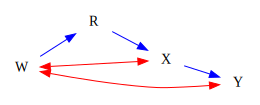

In [42]:
vertices_case2 = ['W', 'R','X','Y']
di_edges_case2 = [('W','R'), ('R','X'),('X','Y')]
bi_edges_case2 = [('W','X'), ('W','Y')]
Case2 = ADMG(vertices_case2, di_edges_case2, bi_edges_case2)
Case2.draw(direction='LR')

In [43]:
one_id = OneLineID(graph=Case2, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [44]:
ate_obj_case2 = CausalEffect(graph=Case2, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_case2


 Effect is identified. 
 
 Available estimators:
 
1. Nested IPW (n-ipw)
2. Augmented NIPW (anipw) 

Suggested estimator is Augmented NIPW 



In [45]:
obs_data1_case2 = pd.read_csv('obs_data1_Case2.csv', sep=',')
obs_data2_case2 = pd.read_csv('obs_data2_Case2.csv', sep=',')
obs_data3_case2 = pd.read_csv('obs_data3_Case2.csv', sep=',')
obs_data4_case2 = pd.read_csv('obs_data4_Case2.csv', sep=',')
obs_data5_case2 = pd.read_csv('obs_data5_Case2.csv', sep=',')
obs_data6_case2 = pd.read_csv('obs_data6_Case2.csv', sep=',')
obs_data7_case2 = pd.read_csv('obs_data7_Case2.csv', sep=',')
obs_data8_case2 = pd.read_csv('obs_data8_Case2.csv', sep=',')
obs_data9_case2 = pd.read_csv('obs_data9_Case2.csv', sep=',')
obs_data10_case2 = pd.read_csv('obs_data10_Case2.csv', sep=',')

In [46]:
obs_data_list_case2 = []
obs_data_list_case2.append(obs_data1_case2)
obs_data_list_case2.append(obs_data2_case2)
obs_data_list_case2.append(obs_data3_case2)
obs_data_list_case2.append(obs_data4_case2)
obs_data_list_case2.append(obs_data5_case2)
obs_data_list_case2.append(obs_data6_case2)
obs_data_list_case2.append(obs_data7_case2)
obs_data_list_case2.append(obs_data8_case2)
obs_data_list_case2.append(obs_data9_case2)
obs_data_list_case2.append(obs_data10_case2)

In [47]:
intv_data1_case2 = pd.read_csv('intv_data1_Case2.csv', sep=',')
intv_data2_case2 = pd.read_csv('intv_data2_Case2.csv', sep=',')
intv_data3_case2 = pd.read_csv('intv_data3_Case2.csv', sep=',')
intv_data4_case2 = pd.read_csv('intv_data4_Case2.csv', sep=',')
intv_data5_case2 = pd.read_csv('intv_data5_Case2.csv', sep=',')
intv_data6_case2 = pd.read_csv('intv_data6_Case2.csv', sep=',')
intv_data7_case2 = pd.read_csv('intv_data7_Case2.csv', sep=',')
intv_data8_case2 = pd.read_csv('intv_data8_Case2.csv', sep=',')
intv_data9_case2 = pd.read_csv('intv_data9_Case2.csv', sep=',')
intv_data10_case2 = pd.read_csv('intv_data10_Case2.csv', sep=',')

In [48]:
intv_data_list_case2 = []
intv_data_list_case2.append(intv_data1_case2)
intv_data_list_case2.append(intv_data2_case2)
intv_data_list_case2.append(intv_data3_case2)
intv_data_list_case2.append(intv_data4_case2)
intv_data_list_case2.append(intv_data5_case2)
intv_data_list_case2.append(intv_data6_case2)
intv_data_list_case2.append(intv_data7_case2)
intv_data_list_case2.append(intv_data8_case2)
intv_data_list_case2.append(intv_data9_case2)
intv_data_list_case2.append(intv_data10_case2)

# absolute average error (AAE)

In [ ]:
#means_n_ipw_case2 = [0]*10
#means_list_n_ipw_case2 = {}
means_anipw_case2 = [0]*10
means_list_anipw_case2 = {}

for num_data_points in [15,20,30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case2 = abs(intv_data_list_case2[i]['Y'].mean() - obs_data_list_case2[i]['Y'].mean())
    data = obs_data_list_case2[i].iloc[0:num_data_points,]
    #ace_n_ipw_case2 = ate_obj_case2.compute_effect(data, "n-ipw")
    #means_n_ipw_case2[i] = abs(True_case2 - ace_n_ipw_case2)
    ace_anipw_case2 = ate_obj_case2.compute_effect(data, "anipw")
    means_anipw_case2[i] = abs(True_case2 - ace_anipw_case2)
  means_list_anipw_case2[num_data_points] = (means_anipw_case2)
  means_anipw_case2 = [0]*10
  #means_list_n_ipw_case2[num_data_points] = means_n_ipw_case2
  #means_n_ipw_case2 = [0]*10

It produces error for both of the suggested estimators.